### **2. Preparación de Datos**

**Tratamiento de valores faltantes**: Durante el análisis exploratorio de datos (EDA), verifiqué si había valores nulos o faltantes y confirmé que el dataset está completo. No es necesario realizar ninguna imputación, por lo que puedo avanzar sin contratiempos a la siguiente etapa de preparación de datos.

**Limpieza y normalización de los datos**: 
- **Conversión de Texto a Minúsculas**: Convertiré a minúsculas los textos en las columnas clave para evitar duplicidades por diferencias de formato.
- **Separación de `car_name`**: Dividiré la columna `car_name` en `marca` y `modelo` para tratarlas de forma independiente.
- **Corrección de Nombres en `marca` y `modelo`**: Corregiré errores tipográficos y normalizaré los nombres para garantizar la consistencia de los datos.
- **Normalización de Modelos**: Usaré expresiones regulares para limpiar y unificar los nombres de los modelos, eliminando información redundante.
- **Corrección de Modelos Específicos**: Aplicaré un diccionario de corrección para ajustar modelos con nombres incorrectos o confusos.
- **Revisión Final y Ordenación**: Revisaré y ordenaré los datos por marca y modelo para asegurar la coherencia de las correcciones realizadas.

**Lectura del dataset**
Para iniciar, procederé a leer el conjunto de datos desde el archivo ./ML_cars.csv. utilizando la biblioteca pandas.

In [1]:
import pandas as pd

cars = pd.read_csv('./ML_cars.csv')  # Carga los datos
print("* Los datos fueron cargados correctamente.")
print("- - " * 11)
# Muestra los primeros 5 registros del dataframe
print("* Primeros 5 registros del dataset:")
cars.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Primeros 5 registros del dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
import pandas as pd
import inflection

# Normalización Nombres de las Columnas
print(f"* Nombres originales de las columnas:\n  {cars.columns}\n")
print("- " * 40)
def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

cars.columns = [convert_to_snake_case(col) for col in cars.columns]

#Crear el diccionario con los titulos de las columnas que vamos a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','car_width': '',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg','carwidth':"car_width"
}

#Cambiar los nombres de las columnas
for columna in cars.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        cars.rename(columns={columna: nuevo_nombre}, inplace=True)

#Verificar que los nombres se hallan cambiado 
print(f"* Nuevos nombres de las columnas:\n  {cars.columns}")

* Nombres originales de las columnas:
  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Nuevos nombres de las columnas:
  Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


In [3]:
#Separar la columna car_id en dos columnas (marca y modelo)
cars['car_name'] = cars['car_name'].str.lower()
cars[['marca', 'modelo']] = cars['car_name'].str.split(' ', n=1, expand=True)
cars = cars[['car_id', 'car_name', 'marca', 'modelo'] + [col for col in cars.columns if col not in ['car_id', 'car_name', 'marca', 'modelo']]]

# Reorganizar las columnas para que 'car_id', 'car_name', 'marca', y 'modelo' sean las primeras
styled_cars = cars.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])
styled_cars

# Estilo para alinear el contenido de las columnas 'marca' y 'modelo' a la izquierda
cars = cars.drop('car_name', axis=1)
print("* Los valores únicos de la columna marca son:")
print("- " * 37)
print(cars.marca.unique())

* Los valores únicos de la columna marca son:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [4]:
# Corrección en nombres de marcas
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}
cars['marca'] = cars['marca'].replace(marca_correccion)

# Combinaciones únicas de marca y modelo
sorted_cars = cars.sort_values(by=['marca', 'modelo'], ascending=[True, True])
print("* Combinaciones únicas de marca y modelo:")
print("- " * 37)
print((cars['marca'] + ' | ' + cars['modelo'].astype(str)).unique(), end='\n\n')

* Combinaciones únicas de marca y modelo:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa romeo | giulia' 'alfa romeo | stelvio' 'alfa romeo | quadrifoglio'
 'audi | 100 ls' 'audi | 100ls' 'audi | fox' 'audi | 5000' 'audi | 4000'
 'audi | 5000s (diesel)' 'bmw | 320i' 'bmw | x1' 'bmw | x3' 'bmw | z4'
 'bmw | x4' 'bmw | x5' 'chevrolet | impala' 'chevrolet | monte carlo'
 'chevrolet | vega 2300' 'dodge | rampage' 'dodge | challenger se'
 'dodge | d200' 'dodge | monaco (sw)' 'dodge | colt hardtop'
 'dodge | colt (sw)' 'dodge | coronet custom' 'dodge | dart custom'
 'dodge | coronet custom (sw)' 'honda | civic' 'honda | civic cvcc'
 'honda | accord cvcc' 'honda | accord lx' 'honda | civic 1500 gl'
 'honda | accord' 'honda | civic 1300' 'honda | prelude'
 'honda | civic (auto)' 'isuzu | mu-x' 'isuzu | d-max '
 'isuzu | d-max v-cross' 'jaguar | xj' 'jaguar | xf' 'jaguar | xk'
 'mazda | rx3' 'mazda | glc deluxe' 'mazda | rx2 coupe' 'mazda | rx-4'
 'mazda | 626

In [5]:
import re
import pandas as pd

# Limpieza de la columna modelo
def limpiar_modelo(input_string, modelo):
    # Patrón regex que coincide con el modelo seguido de cualquier cosa
    patron = re.compile(rf'{modelo}.*', flags=re.IGNORECASE)
    
    # Reemplazar todas las ocurrencias que coinciden con el patrón por el modelo
    return re.sub(patron, modelo, input_string)

# Lista de modelos a limpiar
modelos_a_limpiar = ['accord', 'civic', '100', 'corolla', 'corona', '99', 'celica', 
                     'century', 'rabbit', 'mirage', 'glc', 'fury', 'd-max', 
                     'coronet', 'colt']

# Aplicar la limpieza a cada modelo
for modelo in modelos_a_limpiar:
    cars['modelo'] = cars['modelo'].astype(str).apply(limpiar_modelo, modelo=modelo)

# Visualizar el resultado en pantalla
print("* Resultados de la limpieza de la columna 'modelo':")
print("-" * 51)
print(cars[['modelo']].head())  # Muestra las primeras filas de la columna modelo

* Resultados de la limpieza de la columna 'modelo':
---------------------------------------------------
         modelo
0        giulia
1       stelvio
2  quadrifoglio
3           100
4           100


In [6]:
# Corrección de los nombres de modelos
modelo_correccion = {'100': 'a6', 
                     'fox': '80',
                     'corona': 'cressida',
                     'mark ii': 'cressida'}
cars['modelo'] = cars['modelo'].replace(modelo_correccion)
print("* Resultados de la corrección de la columna 'modelo':")
print("-" * 51)
print(cars[['modelo']].head())  # Muestra las primeras filas de la columna modelo

* Resultados de la corrección de la columna 'modelo':
---------------------------------------------------
         modelo
0        giulia
1       stelvio
2  quadrifoglio
3            a6
4            a6


In [7]:
# Redondear la columna 'price' y convertir a enteros
cars['price'] = cars['price'].round().astype(int)

# Calcula la mediana de la columna "price"
mediana_precio = cars['price'].median()

# Crea la columna "clasificacion_precio" utilizando una condición
cars['clasificacion_precio'] = (cars['price'] <= mediana_precio).astype(int)
print(* "Clasificación de precios:")
print("-" * 51)
print(cars[['price', 'clasificacion_precio']]) #1 si el valor se encuentra debajo de la mediana y 0 si se encuentra sobre la mediana

C l a s i f i c a c i ó n   d e   p r e c i o s :
---------------------------------------------------
     price  clasificacion_precio
0    13495                     0
1    16500                     0
2    16500                     0
3    13950                     0
4    17450                     0
..     ...                   ...
200  16845                     0
201  19045                     0
202  21485                     0
203  22470                     0
204  22625                     0

[205 rows x 2 columns]


**Pasos importantes para procesar y clasificar los precios de los autos del DataFrame.**

In [8]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 20}

In [9]:
# columna "door_number": número de puertas
print("* Columna: door_number (número de puertas)")
print("- " * 25)
print(f"* Valores Originales: {cars['door_number'].unique()}")
print("- " * 25)
cars['door_number'] = cars['door_number'].map(mapeo)  # Mapea los valores de texto a números
print("* Valores Convertidos a Números:")
print("- " * 25)
print(cars['door_number'])
print("- " * 25)

* Columna: door_number (número de puertas)
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['two' 'four']
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
- - - - - - - - - - - - - - - - - - - - - - - - - 
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - 


In [10]:
#columna "cylinder_number":número de cilindros del motor
print("* Columna: cylinder_number")
print("- " * 40)
print(f"* Valores Originales: {cars['cylinder_number'].unique()}")
print("- " * 40)
cars['cylinder_number'] = cars['cylinder_number'].map(mapeo)
cars['cylinder_number'] = cars['cylinder_number'].fillna(0)
cars['cylinder_number'] = cars['cylinder_number'].astype(int)
print("* Valores Convertidos a Números:")
print("- " * 40)
print(cars['cylinder_number'])
print("- " * 40)

* Columna: cylinder_number
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int32
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


**Análisis Visual de los Datos**

**Normalización en las Filas**: Busco los valores atipicos (outliers) de manera visual  mediante histogramas

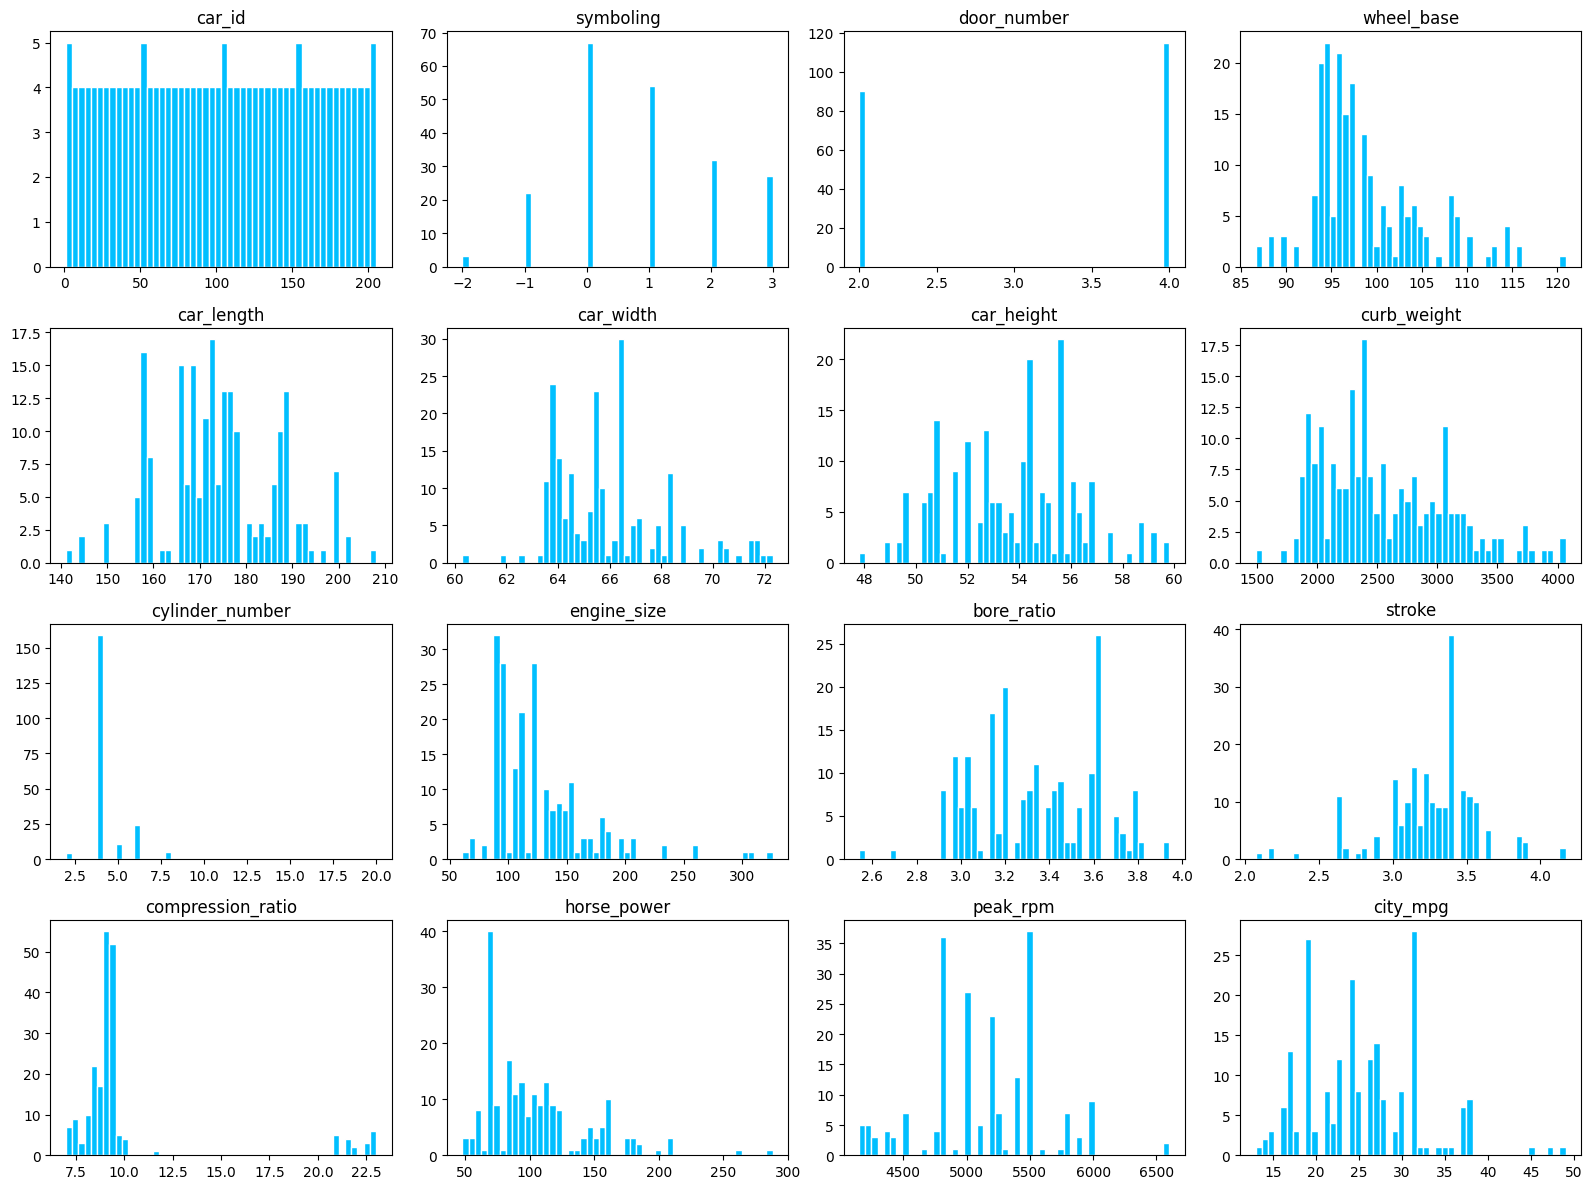

In [11]:
import pandas as pd
import matplotlib.pyplot as plt  # Importa la biblioteca para graficar

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Seleccionar las primeras 16 columnas numéricas (si hay más de 16)
selected_columns = numeric_columns.iloc[:, :16]

# Calcular el número de filas y columnas para los subplots (4x4 = 16 gráficos)
num_rows = 4
num_cols = 4

# Crear subplots para 16 columnas numéricas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Aplanar la matriz de subplots
axes = axes.flatten()

# Iterar sobre las 16 columnas numéricas y crear histogramas
for i, col in enumerate(selected_columns.columns):
    axes[i].hist(cars[col], bins=50, color='#00BFFF', edgecolor='white')  # Cambié df a cars
    axes[i].set_title(col)

# Ajustar el diseño de los subplots para evitar superposición
plt.tight_layout()

# Mostrar el histograma
plt.show()

In [12]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Seleccionar las primeras 16 columnas numéricas (si hay más de 16)
selected_columns = numeric_columns.iloc[:, :16]

# Mostrar las columnas seleccionadas
print(selected_columns)


     car_id  symboling  door_number  wheel_base  car_length  car_width  \
0         1          3            2        88.6       168.8       64.1   
1         2          3            2        88.6       168.8       64.1   
2         3          1            2        94.5       171.2       65.5   
3         4          2            4        99.8       176.6       66.2   
4         5          2            4        99.4       176.6       66.4   
..      ...        ...          ...         ...         ...        ...   
200     201         -1            4       109.1       188.8       68.9   
201     202         -1            4       109.1       188.8       68.8   
202     203         -1            4       109.1       188.8       68.9   
203     204         -1            4       109.1       188.8       68.9   
204     205         -1            4       109.1       188.8       68.9   

     car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
0          48.8         2548         

Después de limpiar los datos, realicé un análisis visual utilizando histogramas para identificar posibles valores atípicos en las variables numéricas. En algunos casos, observé outliers en los extremos de las distribuciones, como en las variables wheelbase, carlength, carwidth, donde los valores atípicos aparecen hacia la derecha. Lo mismo ocurre con curbweight, enginesize, horsepower, que muestran outliers en los extremos superiores. También se identificaron posibles valores atípicos en compressionratio, price, citympg, y highwaympg, donde los datos presentan concentraciones en rangos más bajos y algunos valores aislados. Para profundizar en la identificación de outliers, sería conveniente aplicar métodos formales, como el rango intercuartílico o el Z-score.

In [13]:
# Verificar los nombres de las columnas en el DataFrame
print(cars.columns)

Index(['car_id', 'marca', 'modelo', 'symboling', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price', 'clasificacion_precio'],
      dtype='object')


In [14]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Aplicar la función para las columnas numéricas de interés
columns_to_check = ['wheel_base', 'car_length', 'curb_weight', 'engine_size', 
                    'horse_power', 'compression_ratio', 'price', 'city_mpg', 'highway_mpg']

for col in columns_to_check:
    outliers = detect_outliers_iqr(cars, col)  # Aquí 'cars' es el DataFrame correcto
    print(f"Outliers en {col}:")
    print(outliers[[col]])
    print("-" * 40)

Outliers en wheel_base:
    wheel_base
70       115.6
71       115.6
73       120.9
----------------------------------------
Outliers en car_length:
    car_length
18       141.1
----------------------------------------
Outliers en curb_weight:
Empty DataFrame
Columns: [curb_weight]
Index: []
----------------------------------------
Outliers en engine_size:
    engine_size
15          209
16          209
17          209
47          258
48          258
49          326
71          234
72          234
73          308
74          304
----------------------------------------
Outliers en horse_power:
     horse_power
49           262
105          200
126          207
127          207
128          207
129          288
----------------------------------------
Outliers en compression_ratio:
     compression_ratio
9                  7.0
29                 7.0
49                11.5
63                22.7
66                22.0
67                21.5
68                21.5
69                21.5


#### Resumen de Outliers:
- wheelbase: Outliers en 115.6 y 120.9.
- carlength: Outlier en 141.1.
- curbweight: Sin outliers.
- enginesize: Outliers en 209, 258 y 326.
- horsepower: Outliers en 262, 200 y 288.
- compressionratio: Outliers en 7.0 y 22.7.
- price: Outliers en 30760.0 y 41315.0.
- citympg: Outliers en 47 y 49.
- highwaympg: Outliers en 53 y 54.


#### Tratamiento de los outliers:
He identificado la presencia de outliers en varias variables clave: wheel_base, car_length, engine_size, horse_power, compression_ratio, price, city_mpg, y highway_mpg. Para evitar que estos valores extremos afecten los resultados de mis análisis y modelos, he decidido reemplazarlos por la mediana de cada variable. Esta técnica me permite mantener el tamaño del dataset mientras elimino el impacto de los outliers, ya que la mediana es una medida robusta frente a valores extremos.

In [15]:
# Función para reemplazar outliers por la mediana
def reemplazar_outliers_mediana(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calcular la mediana de la columna
    mediana = df[column].median()
    # Reemplazar los valores por fuera del IQR por la mediana
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mediana

# Aplicamos la función a las columnas que tienen outliers
columns_with_outliers = ['wheel_base', 'car_length', 'engine_size', 'horse_power', 
                         'compression_ratio', 'price', 'city_mpg', 'highway_mpg']

for col in columns_with_outliers:
    reemplazar_outliers_mediana(cars, col)

# Mostramos un resumen después de reemplazar los outliers
print("Datos después de reemplazar outliers:")
print(cars.describe())

Datos después de reemplazar outliers:
           car_id   symboling  door_number  wheel_base  car_length  \
count  205.000000  205.000000   205.000000  205.000000  205.000000   
mean   103.000000    0.834146     3.121951   98.458537  174.205854   
std     59.322565    1.245307     0.994966    5.570721   12.118818   
min      1.000000   -2.000000     2.000000   86.600000  144.600000   
25%     52.000000    0.000000     2.000000   94.500000  166.800000   
50%    103.000000    1.000000     4.000000   97.000000  173.200000   
75%    154.000000    2.000000     4.000000  101.200000  183.100000   
max    205.000000    3.000000     4.000000  114.200000  208.100000   

        car_width  car_height  curb_weight  cylinder_number  engine_size  \
count  205.000000  205.000000   205.000000       205.000000   205.000000   
mean    65.907805   53.724878  2555.565854         4.419512   120.326829   
std      2.145204    2.443522   520.680204         1.441544    28.356891   
min     60.300000   47.8000

#### Aplicación de One-Hot Encoding a Variables Categóricas
En esta etapa, aplicaré One-Hot Encoding a las variables categóricas de mi dataset. Utilizaré la función get_dummies de pandas para convertir las categorías en columnas binarias. Esto facilitará el uso de estas variables en mis modelos de machine learning. Me enfocaré en las columnas fuel_type, marca y modelo, eliminando la primera categoría para evitar problemas de multicolinealidad. Esto permitirá que mi DataFrame esté en un formato adecuado para el análisis posterior.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Asegúrate de importar StandardScaler

# Aplicamos One-Hot Encoding a las variables categóricas
categorical_columns = ['fuel_type', 'marca', 'modelo']  # Uso los nombres correctos

# Verificamos que las columnas categóricas existan en el DataFrame
missing_cols = [col for col in categorical_columns if col not in cars.columns]
if missing_cols:
    print(f"Advertencia: Las siguientes columnas no se encontraron: {missing_cols}")

# Aplicamos One-Hot Encoding
cars_encoded = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

In [17]:
# Mostramos las primeras filas del nuevo DataFrame
print("* Primeras filas del DataFrame codificado:")
print(cars_encoded.head())

* Primeras filas del DataFrame codificado:
   car_id  symboling aspiration  door_number     car_body drive_wheel  \
0       1          3        std            2  convertible         rwd   
1       2          3        std            2  convertible         rwd   
2       3          1        std            2    hatchback         rwd   
3       4          2        std            4        sedan         fwd   
4       5          2        std            4        sedan         4wd   

  engine_location  wheel_base  car_length  car_width  ...  modelo_vega 2300  \
0           front        88.6       168.8       64.1  ...             False   
1           front        88.6       168.8       64.1  ...             False   
2           front        94.5       171.2       65.5  ...             False   
3           front        99.8       176.6       66.2  ...             False   
4           front        99.4       176.6       66.4  ...             False   

   modelo_versa modelo_x1  modelo_x3  model

In [18]:
# Guardar el DataFrame transformado en un archivo CSV
cars_encoded.to_csv('cars_encoded.csv', index=False)  # index=False para no guardar el índice

# Guardar el DataFrame transformado en un archivo CSV
cars_encoded.to_csv('cars_encoded.csv', index=False)  # index=False para no guardar el índice

# Especificar las columnas numéricas que queremos escalar
numeric_columns = [
    'wheel_base', 'car_length', 'car_width', 
    'curb_weight', 'engine_size', 'horse_power', 
    'compression_ratio', 'city_mpg', 'highway_mpg', 'price'
]


# Verificar que las columnas numéricas existan en el DataFrame
missing_numeric_cols = [col for col in numeric_columns if col not in cars_encoded.columns]
if missing_numeric_cols:
    print(f"Advertencia: Las siguientes columnas numéricas no se encontraron: {missing_numeric_cols}")

In [19]:
# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado a las columnas numéricas
cars_encoded[numeric_columns] = scaler.fit_transform(cars_encoded[numeric_columns])

# Mostramos las primeras filas del DataFrame escalado para verificar el resultado
print("* Primeras filas del DataFrame escalado:")
print(cars_encoded.head())


* Primeras filas del DataFrame escalado:
   car_id  symboling aspiration  door_number     car_body drive_wheel  \
0       1          3        std            2  convertible         rwd   
1       2          3        std            2  convertible         rwd   
2       3          1        std            2    hatchback         rwd   
3       4          2        std            4        sedan         fwd   
4       5          2        std            4        sedan         4wd   

  engine_location  wheel_base  car_length  car_width  ...  modelo_vega 2300  \
0           front   -1.774038   -0.447163  -0.844782  ...             False   
1           front   -1.774038   -0.447163  -0.844782  ...             False   
2           front   -0.712336   -0.248639  -0.190566  ...             False   
3           front    0.241396    0.198040   0.136542  ...             False   
4           front    0.169416    0.198040   0.230001  ...             False   

   modelo_versa modelo_x1  modelo_x3  modelo_